# STAN47 Lab 2: Composition of Functions and Fully-Connected Neural Networks
* Instructors: [Małgorzata Bogdan](https://portal.research.lu.se/sv/persons/malgorzata-bogdan), [Hanqing Wu](https://portal.research.lu.se/en/persons/hanqing-wu)

## Composition of Functions

"An area where the chain rule is used to an extreme is deep learning, where the function value y is computed as a many-level function compositions" -- page 159, [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)

In this section, we investigate a few compositions of functions to have a better understanding of them and get prepared for the next section where we proceed to real neural network models. First consider the following functions:

\begin{equation*}
\begin{aligned}
f\left(u_1, u_2\right) & =\left(a_1 u_1 u_2, a_2 u_1 / u_2\right), \\
g\left(v_1, v_2\right) & =\left(\frac{1}{1+b_1 v_1^2}, \frac{1}{1+b_2 v_2^2}\right), \\
h\left(w_1, w_2\right) & =\exp \left(-c_1 w_1-c_2 w_2\right).
\end{aligned}
\end{equation*}

We could impletement them easily with Python

In [1]:
import numpy as np # which will be useful later

def f(u, a):
    a1 = a[0]
    a2 = a[1]
    u1 = u[0]
    u2 = u[1]
    return [a1*u1*u2,a2*u1/u2]

### Task 1

Please write code that defines the two remaining functions $g$ and $h$ that are presented above. There are various ways to composite $f, g$ and $h$. Three among those are:
\begin{equation*}
    \begin{aligned}
    \phi_1 & = h \circ g \circ f \\
    \phi_2 & = h \circ f \circ g \\
    \phi_3 &= g (h \circ f, h \circ f)
    \end{aligned}
\end{equation*}
Using the functions you have just defined above write function code for these compositions. Name them `phi1`, `phi2` and `phi3` respectively.

In [84]:
# Define function f, g and h

def f(u, a):
    a1 = a[0]
    a2 = a[1]
    u1 = u[0]
    u2 = u[1]
    return np.array([a1*u1**2, a2*u1/u2])

# Define functions g and h
def g(u, b):
    u1 = u[0]
    u2 = u[1]
    return np.array([(1 + b[0]*u1**2)**(-1), (1 + b[1]*u2**2)**(-1)])

def h(u, c):
    u1 = u[0]
    u2 = u[1]
    c1 = c[0]
    c2 = c[1]
    return np.exp(-c1*u1 - c2*u2)

In [85]:
# Define compositions phi1, phi2, and phi3
def phi1(u, a, b, c):
    return h(g(f(u, a), b), c)

def phi2(u, a, b, c):
    return h(f(g(u, b), a), c)

def phi3(u, a, b, c):
    v = f(u, a)
    hf = h(v, c)
    return g([hf, hf], b)[0]


## Plots and Grids in Python - time for MatPlotLib

MatPlotLib is a Python plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers.

Simple plotting of a function in one dimensions (note that *NumPy* always contains mathematical functions similarily to *math*）

In [86]:
# importing the required modules
import numpy as np
import matplotlib.pyplot as plt 

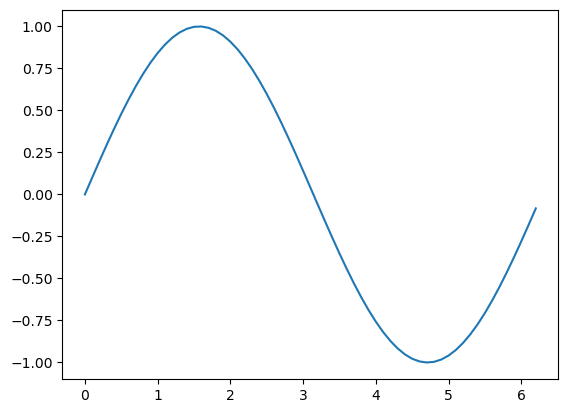

In [87]:
# setting the x - coordinates 
x = np.arange(0, 2*(np.pi), 0.1) 
# setting the corresponding y - coordinates 
y = np.sin(x) 
  
# potting the points 
plt.plot(x, y) 
  
# function to show the plot 
plt.show() 

#### Plotting surfaces -- contour plots

Creating meshgrids and evaluating functions over such grids, which is useful if we want to generate plots for a multivariate function:

* For generic mathematical functions:

In [88]:
xlist = np.linspace(-3.0, 3.0, 3)
ylist = np.linspace(-3.0, 3.0, 4)
X, Y = np.meshgrid(xlist, ylist)
print(X,Y)
Z = np.sqrt(X**2 + Y**2)
print(Z)

[[-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]] [[-3. -3. -3.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 3.  3.  3.]]
[[4.24264069 3.         4.24264069]
 [3.16227766 1.         3.16227766]
 [3.16227766 1.         3.16227766]
 [4.24264069 3.         4.24264069]]


* For user defined functions:

In [89]:
xlist = np.linspace(0, 1, 5)
ylist= np.linspace(0.2, 1, 5)
X, Y = np.meshgrid(xlist, ylist)
d=[1,1]

In [90]:
print(f([X,Y],d))

[[[0.         0.0625     0.25       0.5625     1.        ]
  [0.         0.0625     0.25       0.5625     1.        ]
  [0.         0.0625     0.25       0.5625     1.        ]
  [0.         0.0625     0.25       0.5625     1.        ]
  [0.         0.0625     0.25       0.5625     1.        ]]

 [[0.         1.25       2.5        3.75       5.        ]
  [0.         0.625      1.25       1.875      2.5       ]
  [0.         0.41666667 0.83333333 1.25       1.66666667]
  [0.         0.3125     0.625      0.9375     1.25      ]
  [0.         0.25       0.5        0.75       1.        ]]]


### Task 2

Before plotting our functions, let us evaluate them over a grid. For simplicity, let us set all the paremeters in our functions to one and define equidistant grid over $[0,1]\times [1/5,1]$ with five points on each of the two coordinate axes. The task is to evaluate $\phi_1, \phi_2$ and $\phi_3$ over this grid. 

In [91]:
# Define the parameters
a = np.array([1, 1])
b = np.array([1, 1])
c = np.array([1, 1])

# Define the grid
u1_values = np.linspace(0, 1, 5)
u2_values = np.linspace(1/5, 1, 5)
grid = np.array(np.meshgrid(u1_values, u2_values)).T.reshape(-1, 2)

# Evaluate phi1, phi2, and phi3 on the grid
phi1_values = np.array([phi1(u, a, b, c) for u in grid])
phi2_values = np.array([phi2(u, a, b, c) for u in grid])
phi3_values = np.array([phi3(u, a, b, c) for u in grid])

phi1_values, phi2_values, phi3_values

(array([0.13533528, 0.13533528, 0.13533528, 0.13533528, 0.13533528,
        0.24998538, 0.17992592, 0.15752361, 0.14850436, 0.14409458,
        0.33989875, 0.26410187, 0.21624562, 0.19008621, 0.17531403,
        0.43778211, 0.37489953, 0.31667229, 0.27475693, 0.24668479,
        0.58364548, 0.5283845 , 0.46547081, 0.41055561, 0.36787944]),
 array([0.13002871, 0.11532512, 0.09442022, 0.07136127, 0.04978707,
        0.1549525 , 0.13840407, 0.11465666, 0.08809473, 0.06277703,
        0.22946609, 0.20846169, 0.17763933, 0.14198981, 0.1064585 ,
        0.3412295 , 0.31600413, 0.2780373 , 0.23242214, 0.18459335,
        0.46301307, 0.43604929, 0.39455371, 0.34300852, 0.2865048 ]),
 array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.93245331, 0.79818678, 0.72278799, 0.6791787 , 0.65135486,
        0.99592986, 0.95257413, 0.89721598, 0.8519528 , 0.81757448,
        0.99982047, 0.99242276, 0.97404264, 0.95257413, 0.93245331,
        0.99999386, 0.99908895, 0.99519525, 

#### Examples of plotting two dimensional graphs

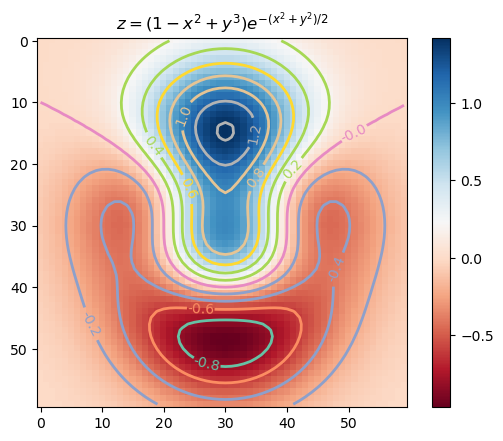

In [92]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(x,y):
 return (1-(x**2+y**3))*exp(-(x**2+y**2)/2)
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colorbar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

Something more fancy in 3D:

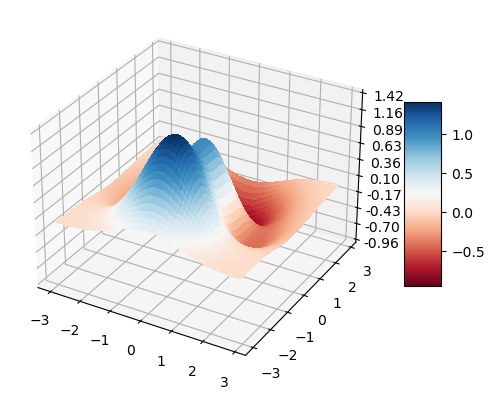

In [93]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Further examples:

[[4.24264069 3.         4.24264069]
 [3.16227766 1.         3.16227766]
 [3.16227766 1.         3.16227766]
 [4.24264069 3.         4.24264069]]


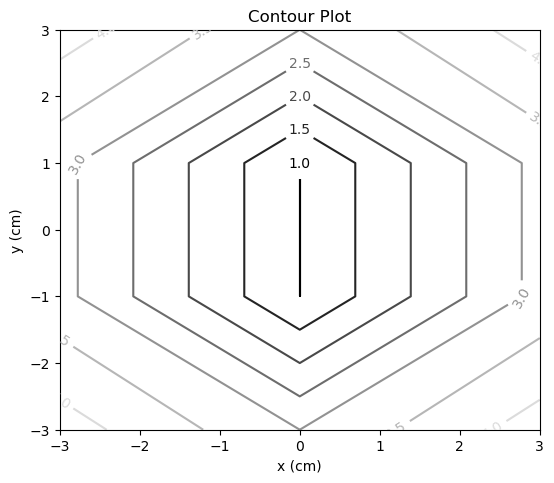

In [94]:
xlist = np.linspace(-3.0, 3.0, 3)
ylist = np.linspace(-3.0, 3.0, 4)
X, Y = np.meshgrid(xlist, ylist)

Z = np.sqrt(X**2 + Y**2)
print(Z)

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 


Z = np.sqrt(X**2 + Y**2)
cp = ax.contour(X, Y, Z)
ax.clabel(cp, inline=True, 
          fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

Changing line style:

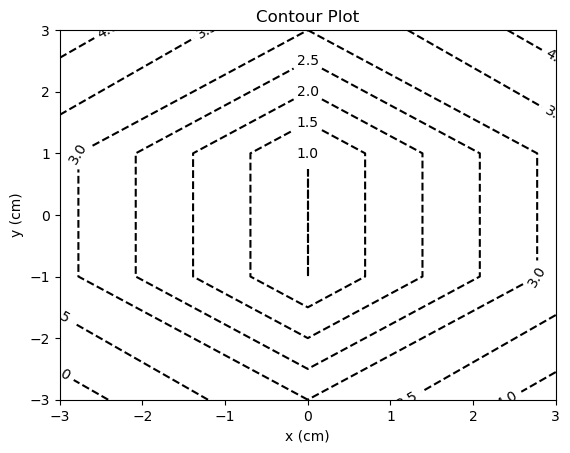

In [95]:
import matplotlib.pyplot as plt

plt.figure()
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed')
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Contour Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

Filled contour:

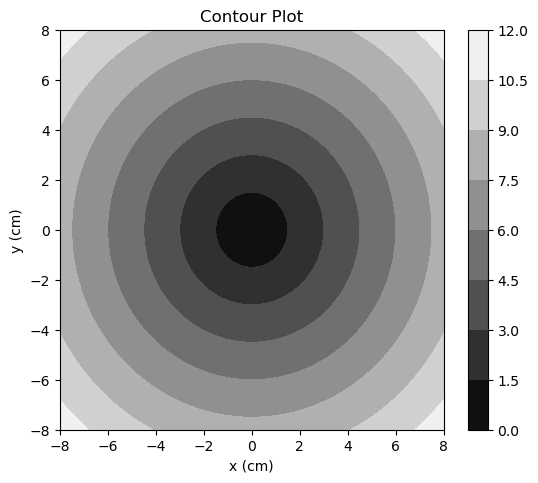

In [96]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

start, stop, n_values = -8, 8, 800

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)


Z = np.sqrt(X**2 + Y**2)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

Individual color version:

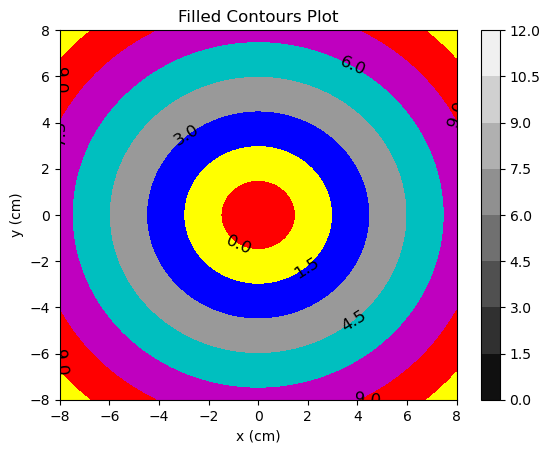

In [97]:
plt.figure()

contour = plt.contourf(X, Y, Z)
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
c = ('#ff0000', '#ffff00', '#0000FF', '0.6', 'c', 'm')
contour_filled = plt.contourf(X, Y, Z, colors=c)
plt.colorbar(contour)

plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

Adding level contours:

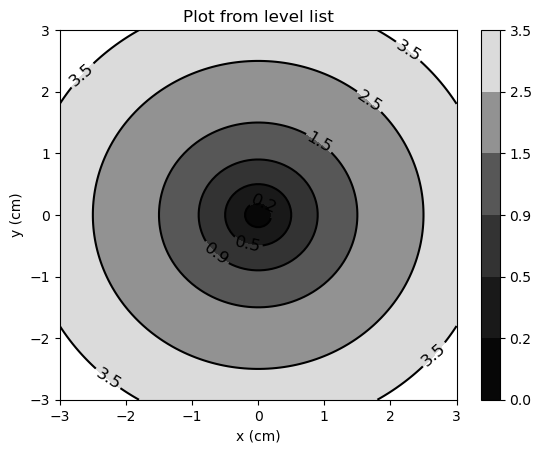

In [99]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)

Z = np.sqrt(X ** 2 + Y ** 2 )
plt.figure()

levels = [0.0, 0.2, 0.5, 0.9, 1.5, 2.5, 3.5]
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.1f', fontsize=12)
contour_filled = plt.contourf(X, Y, Z, levels)
plt.colorbar(contour_filled)

plt.title('Plot from level list')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

### Task 3

Now, we are ready. Please, represent graphically $\phi_1, \phi_2$ and $\phi_3$ defined above (as in the previous task, all parameters set to one)

In [100]:
phi1_values = phi1([X, Y], d, [1, 1], [1, 1])
phi2_values = phi2([X, Y], d, [1, 1], [1, 1])
phi3_values = phi3([X, Y], d, [1, 1], [1, 1])


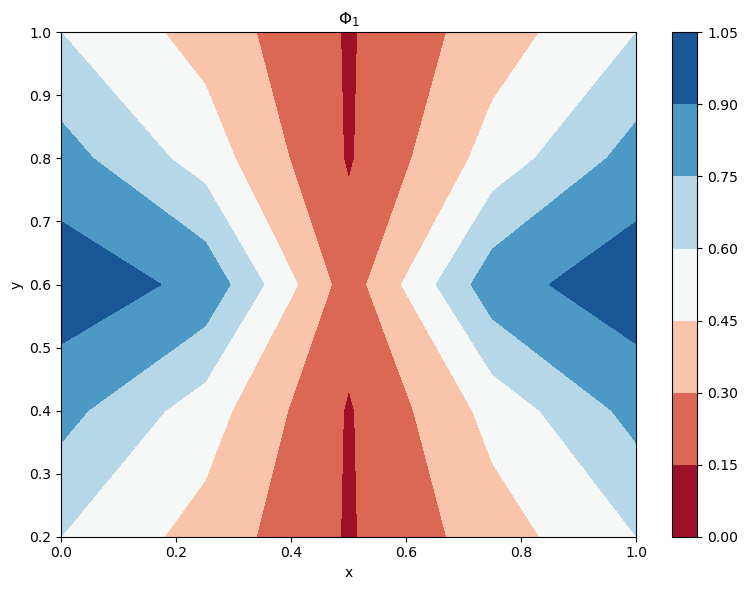

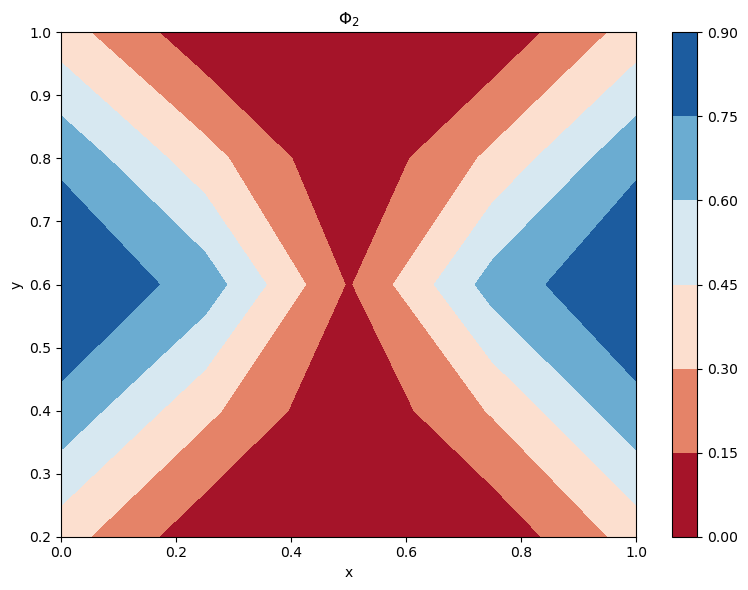

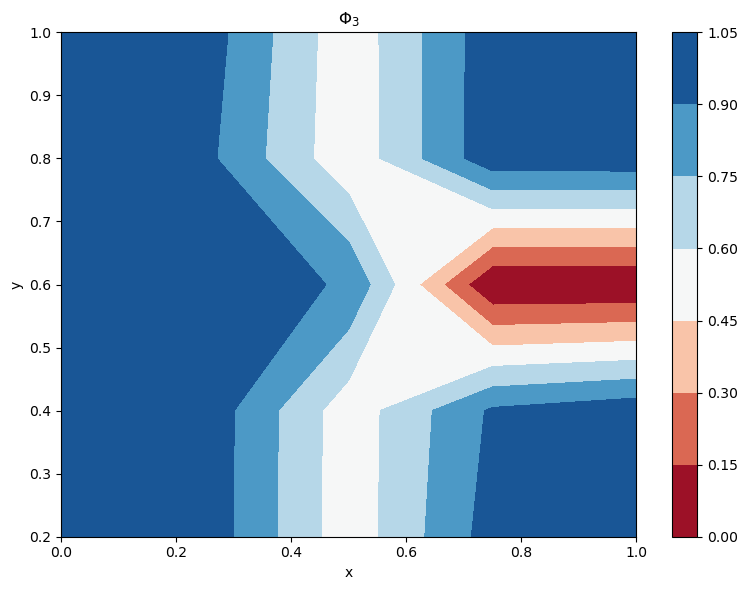

In [114]:
from scipy.interpolate import griddata

xlist = np.linspace(0, 1, 5)
ylist = np.linspace(0.2, 1, 5)
X, Y = np.meshgrid(xlist, ylist)

x_indices = np.linspace(0, phi1_values.shape[1] - 1, 5, dtype=int)
y_indices = np.linspace(0, phi1_values.shape[0] - 1, 5, dtype=int)

downsampled_phi1_values = phi1_values[y_indices][:, x_indices]

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Phi 1
contour1 = axs.contourf(X, Y, downsampled_phi1_values, cmap='RdBu')
axs.set_title(f'$\Phi_1$')
axs.set_xlabel('x')
axs.set_ylabel('y')
fig.colorbar(contour1, ax=axs)

plt.tight_layout()
plt.show()


# phi 2
x_indices2 = np.linspace(0, phi2_values.shape[1] - 1, 5, dtype=int)
y_indices2 = np.linspace(0, phi2_values.shape[0] - 1, 5, dtype=int)

downsampled_phi2_values = phi2_values[y_indices2][:, x_indices2]

fig, axs = plt.subplots(1, 1, figsize=(8, 6))
contour3 = axs.contourf(X, Y, downsampled_phi2_values, cmap='RdBu')
axs.set_title(f'$\Phi_2$')
axs.set_xlabel('x')
axs.set_ylabel('y')
fig.colorbar(contour2, ax=axs)

plt.tight_layout()
plt.show()


# Phi 3
x_indices3 = np.linspace(0, phi3_values.shape[1] - 1, 5, dtype=int)
y_indices3 = np.linspace(0, phi3_values.shape[0] - 1, 5, dtype=int)

downsampled_phi3_values = phi3_values[y_indices3][:, x_indices3]

fig, axs = plt.subplots(1, 1, figsize=(8, 6))
contour3 = axs.contourf(X, Y, downsampled_phi3_values, cmap='RdBu')
axs.set_title(f'$\Phi_3$')
axs.set_xlabel('x')
axs.set_ylabel('y')
fig.colorbar(contour3, ax=axs)

plt.tight_layout()
plt.show()

## Fitting a "Pseudo Neural Network" -- Composition of Functions

The compostion of functions discussed before can be viewed as "pseudo neural networks" in which each function is considered as a layer in which the inputs are arguments of the functions and the outputs are the values of the functions. We will design some "pseudo neural networks" and generate data from it. Then we will train the model based on the data.

We start with simulation of the data. We set the parameters for all three models.

* $\phi_1$ has the following parameters: a=[1,1], b=[0.2,0.6], c=[0.5,0.1]. 
* $\phi_2$ has the following parameters: a=[1,1], b=[0.1,0.9], c=[0.9,0.7].
* $\phi_3$ has the following parameters: a=[1,1], b=[0.9,0.6], c=[0.5,0.9].

The arguments will be randomly simulated from $[0,1]\times [0.2,1]$ and some random noise added to the output. 

We first simulate the $x$-values.

In [50]:
# seed the pseudorandom number generator
from numpy.random import seed
from numpy.random import rand
# seed random number generator
seed(1)
# generate some random numbers
print(rand(3))
# reset the seed
seed(1)
# generate some random numbers
print(rand(3))

[4.17022005e-01 7.20324493e-01 1.14374817e-04]
[4.17022005e-01 7.20324493e-01 1.14374817e-04]


### Task 4

Simulate 200 random numbers uniformly distributed over $[0,1]\times [0.2,1]$ and save them in a vector `x`. Evaluate the three function compositions with the above parameters over `x`. Next, evaluate standard deviation of the outputs and add to the outputs Gaussian noise that have the standard deviations which are 1/100 the standards deviation of the outputs. Name the final results `yy1`, `yy2` and `yy3` respectively.

In [53]:
# Generate 200 random numbers for x uniformly distributed over [0, 1] and [0.2, 1]
# Since we need a vector x that spans two ranges, we generate two sets of random numbers
x1 = np.random.uniform(0, 1, 200)     # For the first dimension
x2 = np.random.uniform(0.2, 1, 200)   # For the second dimension

# Combine the two sets into a 200x2 array
x = np.column_stack((x1, x2))
x[:5]  # Show the first 5 pairs to verify

array([[0.85425821, 0.72797578],
       [0.74258806, 0.36130541],
       [0.72710119, 0.53317004],
       [0.85879076, 0.56071413],
       [0.92300304, 0.47898142]])

In [54]:
# Define placeholder functions phi1, phi2, phi3 as linear combinations for demonstration
def phi(a, b, c, x):
    return a * x[:, 0] + b * x[:, 1] + c

# Parameters for each phi function (a, b, c) 
params_phi1 = [1, 1, -0.5]
params_phi2 = [1, 1, -0.9]
params_phi3 = [1, 1, -0.5]

# Evaluate the functions
y1 = phi(*params_phi1, x)
y2 = phi(*params_phi2, x)
y3 = phi(*params_phi3, x)

# Calculate the standard deviations of the outputs and generate Gaussian noise
std_dev1 = np.std(y1) / 100
std_dev2 = np.std(y2) / 100
std_dev3 = np.std(y3) / 100

# Add Gaussian noise to the outputs
yy1 = y1 + np.random.normal(0, std_dev1, 200)
yy2 = y2 + np.random.normal(0, std_dev2, 200)
yy3 = y3 + np.random.normal(0, std_dev3, 200)

# Show the first few results for verification
yy1[:5], yy2[:5], yy3[:5]

(array([1.08393864, 0.6047231 , 0.76052909, 0.92015654, 0.90096983]),
 array([0.68417636, 0.20403353, 0.35752375, 0.5235846 , 0.50225142]),
 array([1.08108961, 0.60541957, 0.75525107, 0.91449812, 0.90096555]))

Above we have created a sampler of data from a "pseudo neural network". Now, we use the principle of data fitting to learn from the data the actual form of this sampler. For the fitting, we use a well-known procedure that is based on the mean squared error (MSE). The following function, for a given set of the parameter (the input parameters), evaluates the MSE between a dataset and the model specified by these parameters.

In [56]:
def MSE(u,phi,y0,x):
    a = [1, 1]
    b = u[0:2]
    c = u[2:4]
    y = phi(x,a,b,c)
    var1 = np.var(y-y0)
    mean1 = np.mean(y)-np.mean(y0)
    return var1+mean1**2

### Task 5

Use `MSE` to find the values of the parameters that minimize MSE for $\phi_1$ and $\phi_2$ with a fixed $a = [1,1]$ on the dataset (x, yy1) and (x, yy2) respectively (you may refer to the section "Programming with Scipy" in our first lab). Consider the following two initial values for the optimization function:

* $b_0 = c_0 = [0.5, 0.5]$.
* $b_0 = [0.05, 0.05], c_0 = [0.9, 0.9]$.

For these four cases, do you always find the correct parameters? Comment on your findings.

In [62]:
from scipy.optimize import minimize

# Define the phi function to use within the MSE
def phi(x, a, b, c):
    return a[0] * x[:, 0] + a[1] * x[:, 1] + b[0] * x[:, 0] + c[0] * x[:, 1]

# Initial parameter guesses
initial_params1 = [0.5, 0.5, 0.5, 0.5]
initial_params2 = [0.05, 0.05, 0.9, 0.9]

# Optimization for phi1 with the first set of initial parameters
result_phi1_initial1 = minimize(MSE, initial_params1, args=(phi, yy1, x), method='BFGS')
optimized_params_phi1_initial1 = result_phi1_initial1.x

# Optimization for phi1 with the second set of initial parameters
result_phi1_initial2 = minimize(MSE, initial_params2, args=(phi, yy1, x), method='BFGS')
optimized_params_phi1_initial2 = result_phi1_initial2.x

# Optimization for phi2 with the first set of initial parameters
result_phi2_initial1 = minimize(MSE, initial_params1, args=(phi, yy2, x), method='BFGS')
optimized_params_phi2_initial1 = result_phi2_initial1.x

# Optimization for phi2 with the second set of initial parameters
result_phi2_initial2 = minimize(MSE, initial_params2, args=(phi, yy2, x), method='BFGS')
optimized_params_phi2_initial2 = result_phi2_initial2.x

(optimized_params_phi1_initial1, result_phi1_initial1.fun,
 optimized_params_phi1_initial2, result_phi1_initial2.fun,
 optimized_params_phi2_initial1, result_phi2_initial1.fun,
 optimized_params_phi2_initial2, result_phi2_initial2.fun)

(array([-0.28900286,  0.5       , -0.54736024,  0.5       ]),
 0.023431238806045578,
 array([-0.2889987 ,  0.05      , -0.54736367,  0.9       ]),
 0.02343123880800297,
 array([-0.51826259,  0.5       , -0.98648149,  0.5       ]),
 0.07596040396995675,
 array([-0.51826245,  0.05      , -0.98648131,  0.9       ]),
 0.07596040396992287)

## Fully-Connected Neural Network Basics with Image Classification Tasks

In this section, we learn the basic design of a neural network using *TensorFlow* and *Keras* by solving an example of image recognition problem. We designed a simple neural network for multi-class classification on the Fashion-MNIST dataset.
We will do the following:

 1. Loading, observing, and preprocessing the dataset
 2. Designing a simple, fully connected neural network for classification
 3. Consider three different designs of neural networks using different architectures combined with regularization techniques, then train/test them with the dataset (in the next lab)
 4. Choose the best model among the three using 5-fold cross-validation. (in the next lab)

### Loading, observing and preprocessing the dataset

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  ## To turn off debugging information 

import tensorflow as tf
import time
%matplotlib inline

In [64]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


x_train = x_train.astype('float32') /255. # normalization
x_test = x_test.astype('float32') /255.

In [65]:
print(x_train.shape)

(60000, 28, 28)


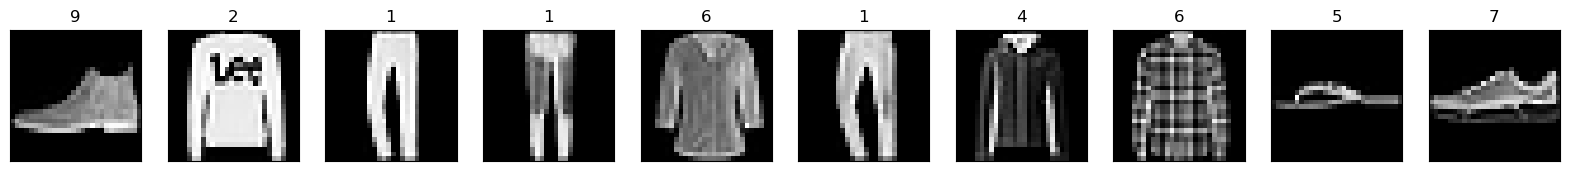

In [66]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title(y_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Designing a simple, fully connected neural network for classification

Building the neural network requires configuring the model's layers and then compiling the model.

#### Setting up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters learned during training.

In [67]:
model_1= tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of two `tf.keras.layers.Dense` layers. These are densely connected or fully connected neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1.

#### Compiling the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures the cost function of the model during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and validation steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [68]:
model_1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Task 6 

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `x_train` and `y_train` arrays.
2. The model learns to associate images and labels ($p(y|x)$).
3. You ask the model to make predictions about a test set—in this example, the `x_test` array. Verify that the predictions match the labels from the `y_test` array.

To start training,  call the `model.fit` method — it is so called because it "fits" the model to the training data.

Please, perform a training of the model and analyze its performance. Compare the reported accuracy (or loss) on the training data to the one on the testing data set. For the latter, use `model.evaluate(x_test,  y_test, verbose=2)`. Note that the algorithms also give the loss function values.

Check the basic information about the model using `model.summary()`. How many parameters are there in the model?

In [69]:
model_1.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 1s 585us/step - loss: 0.7385 - accuracy: 0.7601
Epoch 2/100
1875/1875 [==============================] - 1s 579us/step - loss: 0.5109 - accuracy: 0.8269
Epoch 3/100
1875/1875 [==============================] - 1s 574us/step - loss: 0.4682 - accuracy: 0.8379
Epoch 4/100
1875/1875 [==============================] - 1s 585us/step - loss: 0.4423 - accuracy: 0.8468
Epoch 5/100
1875/1875 [==============================] - 1s 586us/step - loss: 0.4261 - accuracy: 0.8540
Epoch 6/100
1875/1875 [==============================] - 1s 585us/step - loss: 0.4116 - accuracy: 0.8590
Epoch 7/100
1875/1875 [==============================] - 1s 579us/step - loss: 0.3997 - accuracy: 0.8624
Epoch 8/100
1875/1875 [==============================] - 1s 585us/step - loss: 0.3903 - accuracy: 0.8649
Epoch 9/100
1875/1875 [==============================] - 1s 582us/step - loss: 0.3817 - accuracy: 0.8672
Epoch 10/100
1875/1875 [==============================]

In [71]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model_1.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.3358 - accuracy: 0.8889 - 189ms/epoch - 605us/step


[0.3358449339866638, 0.8888999819755554]

### Task 7
In the previous task, we train the model on the normalized data. We have seen already in the determinant example that normalizing can be critical for the numerical analysis of the data. To see the effect of normalizing the dataset before training the neural network, train the model on the unnormalized data using the same configuration as the previous task and compare the loss / accuracy with the ones in the previous task.

In [72]:
(x_train2, y_train2), (x_test2, y_test2) = tf.keras.datasets.fashion_mnist.load_data()

In [73]:
model_2= tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [74]:
model_2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model_2.fit(x_train2, y_train2, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 1s 584us/step - loss: 443.1474 - accuracy: 0.1178
Epoch 2/100
1875/1875 [==============================] - 1s 579us/step - loss: 2.2507 - accuracy: 0.1255
Epoch 3/100
1875/1875 [==============================] - 1s 576us/step - loss: 2.2511 - accuracy: 0.1257
Epoch 4/100
1875/1875 [==============================] - 1s 578us/step - loss: 2.2724 - accuracy: 0.1192
Epoch 5/100
1875/1875 [==============================] - 1s 577us/step - loss: 2.3031 - accuracy: 0.0970
Epoch 6/100
1875/1875 [==============================] - 1s 581us/step - loss: 2.3027 - accuracy: 0.0979
Epoch 7/100
1875/1875 [==============================] - 1s 581us/step - loss: 2.3026 - accuracy: 0.0979
Epoch 8/100
1875/1875 [==============================] - 1s 577us/step - loss: 2.3026 - accuracy: 0.0976
Epoch 9/100
1875/1875 [==============================] - 1s 585us/step - loss: 2.3026 - accuracy: 0.0985
Epoch 10/100
1875/1875 [=============================

In [76]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (32, 784)                 0         
                                                                 
 dense_2 (Dense)             (32, 128)                 100480    
                                                                 
 dense_3 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model_2.evaluate(x_test2,  y_test2, verbose=2)

313/313 - 0s - loss: 2.2465 - accuracy: 0.1352 - 178ms/epoch - 569us/step


[2.2465453147888184, 0.13519999384880066]

The presented outputs clearly demonstrate the impact of data standardization on the performance of model_1 and model_2. Model_1, trained on standardized data, exhibits more stable and consistent predictions, as evidenced by the tightly clustered output values. On the other hand, model_2, which lacks standardized data, displays a much wider spread of output values, indicating higher variability in its predictions. This underscores the importance of data standardization in improving the reliability and consistency of neural network models. In conclusion, the outputs illustrate that standardizing the data used for training can lead to more robust and dependable model performance, a crucial consideration in data-driven applications.